<h1>Sentiment Analysis</h1>
<ul>
    <li><a href="#1" style="text-decoration: none;">Why we to sentiment analyze?</a></li>
    <li><a href="#2" style="text-decoration: none;">What data we used?</a></li>
    <li>
        <ul>
            <li><a href="#3" style="text-decoration: none;">Load Python libray and download some essential data</a></li>
            <li><a href="#4" style="text-decoration: none;">Load data</a></li>
            <li><a href="#5" style="text-decoration: none;">Preprocess and Visualization</a></li>
            <li><a href="#6" style="text-decoration: none;">Text Preprocess</a></li>
            <li><a href="#7" style="text-decoration: none;">Feature Extraction</a></li>
            <li><a href="#8" style="text-decoration: none;">Prediction</a></li>
            <li><a href="#9" style="text-decoration: none;">Evaluation</a></li>
        </ul>
    </li>
</ul>

<h3 id='1'>Why we to sentiment analyze?</h3>
<p>Discussing things you care about can be difficult. The threat of abuse and harassment online means that many people stop expressing themselves and give up on seeking different opinions. Platforms struggle to effectively facilitate conversations, leading many communities to limit or completely shut down user comments.</p>

<h3 id='2'>Is data avaiable</h3>
<p>I don't know the actual source of Data. if you want to use this data. You can download from here</p>

<h3 id='3'>Load Python libray and download some essential data</h3>

In [1]:
# numpy array is a fundamental python library for scientific computing. The main goal of this library is to
# provied array, which single to multi dimensional array. Those array is 50x faster than python provided arrray.
# For example, emathamatic, logic, shape manipuation, I/O, Randndom simulation, DFT, basic linear algebra, basic
# statistic opeartion and so on.
import numpy as np
# The re or regular expression is use to substitute the sting. Patterns or String could be get in Unicode or 8-bit string.
# Both are not possible to mixed up. It is not possible to replace Unicode string by 0-bit string or vice-versa. To replace
# any string there must be same type. The backslash used in regular expression module to indicate special forms.
import re
# The nltk or Natural Language toolkit works for human language data. There have more than 50 corpora and lexical resourse
# such as WordNet as well as it is good for text classification, tokenization, stemming and so on.
import nltk
# This module use to load any dataset file
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
# The pickle use to conver any python object such as list, dict into a charecter stream.This charecter stream hold all 
# of the necessary inpormation to reconstruct python object in another python script.
import pickle
# Load the stopwors corpus
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h3 id='3'>Load data</h3>

In [60]:
movies_data = load_files(r"txt_sentoken/")
data = {"text":movies_data.data, "target":movies_data.target}
df = pd.DataFrame(data)

<h3 id='5'>Preprocess and Visualization</h3>

In [61]:
df.head()

,text,target
0,"b""arnold schwarzenegger has been an icon for a...",0
1,"b""good films are hard to find these days . \ng...",1
2,"b""quaid stars as a man who has taken up the pr...",1
3,b'we could paraphrase michelle pfieffer\'s cha...,0
4,"b""kolya is one of the richest films i've seen ...",1


In [62]:
df.shape

(2000, 2)

In [63]:
df.target.value_counts()

1    1000
0    1000
Name: target, dtype: int64

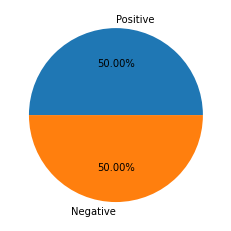

In [64]:
plt.pie(df.target.value_counts(), labels = ['Positive', 'Negative'], autopct='%1.2f%%')
plt.show()

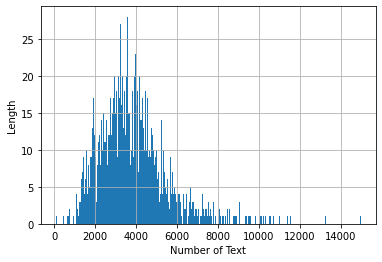

In [65]:
length = df.text.str.len()
length.hist(bins=500)
plt.xlabel('Number of Text')
plt.ylabel('Length')
plt.show()

In [67]:
X = df.text
y = df.target

<h3 id='6'>Text Preprocess</h3>

In [68]:
documents = []
# lematization works for grouping together of similar words. For example. works and work are similar meaning, at this 
# point the job of lemmatizer is to remove 's' from works and include in 'work' group. 
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
for sen in range(0,len(X)):
    # Remove all the special charecter
    document = re.sub(r'\W', ' ', str(X[sen]))
    # Remove all the single charecter
    document = re.sub(r'\s+[a-zA-Z]\s+',' ',document)
    # Remove the single charecter from start
    document = re.sub(r'\^[A-Za-z]\s+',' ', document)
    # Replace multiple space with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', ' ', document)
    # Make all of the charecter lower
    document = document.lower()
    # lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

<h3 id='7'>Feature Extraction</h3>

In [70]:
# Machine can not undersand the raw raw text. They need to convert text into number. The CountVectorizer calss of 
# sklearn.feature_extraction.text library uses to conver text to numerical feature. There are few parameter which 
# is really important. Here we use some paramerer, first one is max_feature, which use to identify most frequent 1500 words
# from bag of word. Whihc is really good to classify.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df = 5, max_df=0.7, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [71]:
# This is really good use to weighting scheme in information retrival.
from sklearn.feature_extraction.text import TfidfTransformer
tfidftransformer = TfidfTransformer()
X = tfidftransformer.fit_transform(X).toarray()

<h3 id='8'>Prediction</h3>

In [72]:
# We use train_test_split function to devide full database into training set and test_set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

<h3 id='9'>Evaluation</h3>

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Classification Report')
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       208
           1       0.85      0.84      0.85       192

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [80]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[180  28]
 [ 30 162]]


In [82]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.855
